Homework 3 : Bert Zhao
===

Phase Portraits, expoententials, and solutions

**Due Friday April 17 at 11:59pm**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

**Relevant Reading**

- Nise Chapters 3 and 4. Note, we haven't covered everything yet in these chapters yet, but we will and it would be good for you to read them.

In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
import math
%matplotlib inline

def plot_phase_portrait(matrices,titles):
    """Makes a plot of the phase portraits of the given matrices"""
    fig, ax = plt.subplots(1, len(matrices), figsize=(5*len(matrices)+1,5),squeeze=False)
    x1,x2 = np.meshgrid(np.linspace(-1, 1, 9),np.linspace(-1, 1, 9))
    for i,[matrix,title] in enumerate(zip(matrices,titles)):
        a = np.array(matrix).astype(np.float64)
        x1dot = a[0,0]*x1 + a[0,1]*x2
        x2dot = a[1,0]*x1 + a[1,1]*x2
        if np.max(np.abs(np.array([x1dot,x2dot]).flatten()))==0:
          scale = 1
        else:
          scale = None
        ax[0,i].quiver(x1, x2, x1dot, x2dot, color='r',headlength=4,headaxislength=4,scale=scale)
        ax[0,i].set_xlabel('$x_1$')
        ax[0,i].set_ylabel('$x_2$')
        ax[0,i].set_title(title)
    return None

try: 
  import google.colab #test for colab
  import IPython
  def setup_typeset():
    """MathJax initialization for the current cell.
    
    This installs and configures MathJax for the current output.
    """
    IPython.display.display(IPython.display.HTML('''
        <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
        <script>
          (() => {
            const mathjax = window.MathJax;
            mathjax.Hub.Config({
            'tex2jax': {
              'inlineMath': [['$', '$'], ['\\(', '\\)']],
              'displayMath': [['$$', '$$'], ['\\[', '\\]']],
              'processEscapes': true,
              'processEnvironments': true,
              'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
              'displayAlign': 'center',
            },
            'HTML-CSS': {
              'styles': {'.MathJax_Display': {'margin': 0}},
              'linebreaks': {'automatic': true},
              // Disable to prevent OTF font loading, which aren't part of our
              // distribution.
              'imageFont': null,
            },
            'messageStyle': 'none'
          });
          mathjax.Hub.Configured();
        })();
        </script>
        '''))
  def custom_latex_printer(exp,**options):
      setup_typeset()
      return printing.latex(exp,**options)
  init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
except:
  init_printing(use_latex='mathjax')

## 1. Phase Portraits and Linearization (20pt)
---
**Do the following question manually.**  You may use python for the last part where you plot the whole phase portrait.

For each of the
following systems, (i) find the equilibria, (ii) linearize the system
around each equilibrium and find the eigenvalues and eigenvectors, (iii)
state whether the **linearized** system is stable at each equilibrium, (iv) draw a phase
portrait by first drawing the phase portrait near the equilibria and
then interpolating. Compare your drawing to a phase portrait of the entire system generated with Python.  Given the phase portrait of the nonlinear systems that you've just drawn, do the systems look stable?  

NOTE: We don't have the tools to state mathematically if all these nonlinear systems are stable or unstable at a given equilibrium point, so just judge by the looks using the definitions given in class.

NOTE2: Marginally stable linearized systems may be stable unstable or marginally stable in their original non-linear forms.

$$
\mathrm{a)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

##a)

i) The only equilibrium point for system a is $(x_1, x_2) = (0, 0)$

ii) The Jacobian of the system is

$$J=\begin{pmatrix} 
  \frac{\partial x_2^2}{\partial x_1} & 
  \frac{\partial x_2^2}{\partial x_2} \\ 
  \frac{\partial x_1^2}{\partial x_1} &
  \frac{\partial x_1^2}{\partial x_2}\end{pmatrix} 
  = \begin{pmatrix} 
  0 & 
  2x_2 \\ 
  2x_1 &
  0 \end{pmatrix}
$$

$$J_{(0,0)} = \begin{pmatrix} 
  0 & 
  0 \\ 
  0 &
  0 \end{pmatrix}$$

This results in eigenvalues: 

$$\lambda_1 = 0, \lambda_2 = 0$$ 

With eigenvectors: $$v_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, v_2 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

iii) The system is marginally stable all around $(x_1,x_2) = (0,0)$

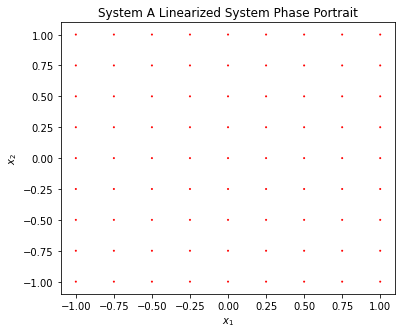

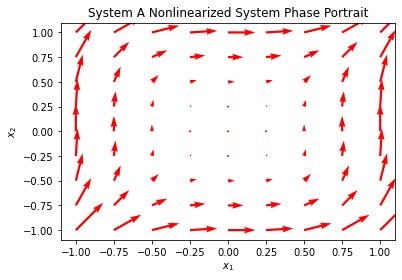

In [353]:
# iv) Linearized phase portrait

A = Matrix([[0, 0], [0, 0]])
plot_phase_portrait([A], ["System A Linearized System Phase Portrait"])

# Nonlinearized phase portrait
plt.figure(2)
x_1 = np.linspace(-1, 1, 9)
x_2 = np.linspace(-1, 1, 9)
X_1, X_2 = np.meshgrid(x_1,x_2)
u = X_2**2
v = X_1**2
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(X_1, X_2, u, v, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("System A Nonlinearized System Phase Portrait");


##b)

i) The only equilibrium point for system b is $(x_1, x_2) = (0, 0)$

ii) The Jacobian of the system is

$$J=\begin{pmatrix} 
  \frac{\partial x_1^2 + x_2^2}{\partial x_1} & 
  \frac{\partial x_1^2 + x_2^2}{\partial x_2} \\ 
  \frac{\partial x_2}{\partial x_1} &
  \frac{\partial x_2}{\partial x_2}\end{pmatrix} 
  = \begin{pmatrix} 
  2x_1 & 
  2x_2 \\ 
  0 &
  1 \end{pmatrix}
$$

$$J_{(0,0)} = \begin{pmatrix} 
  0 & 
  0 \\ 
  0 &
  1 \end{pmatrix}$$

This results in eigenvalues: 

$$\lambda_1 = 0, \lambda_2 = 1$$ 

With eigenvectors: $$v_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, v_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

iii) The system is marginally stable at $(x_1,x_2) = (0,0)$ and along the line $x_2 = 0$ but unstable everywhere else.

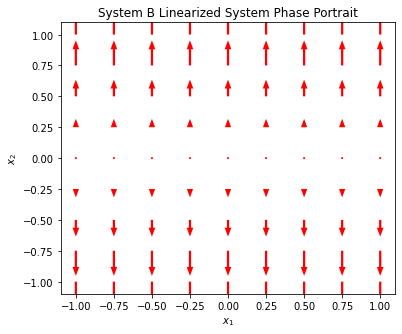

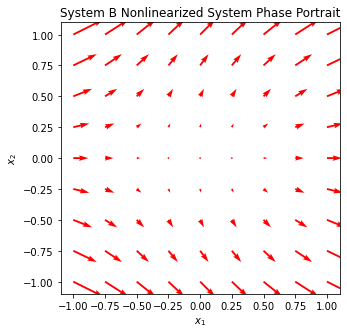

In [354]:
# iv) Linearized phase portrait

A = Matrix([[0, 0], [0, 1]])
plot_phase_portrait([A], ["System B Linearized System Phase Portrait"])

# Nonlinearized phase portrait
plt.figure(2)
x_1 = np.linspace(-1, 1, 9)
x_2 = np.linspace(-1, 1, 9)
X_1, X_2 = np.meshgrid(x_1,x_2)
u = (X_1**2) + (X_2**2)
v = X_2
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(X_1, X_2, u, v, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("System B Nonlinearized System Phase Portrait");


##c)

i) There are multiple sets of equilibrium points for system c. This occurs with any combination of $(x_1, x_2)$ where:

$$x_1 = \frac{(2m+1)\pi} {2}, x_2 = n\pi$$

Where $m$ and $n$ are integers. There are four equilibrium points that will give us all possible Jacobian matrices:

$$(\frac{\pi} {2}, 0)$$
$$(-\frac{\pi} {2}, \pi)$$
$$(\frac{\pi} {2}, -\pi)$$
$$(-\frac{\pi} {2}, 0)$$

ii) The Jacobian of the system is

$$J=\begin{pmatrix} 
  \frac{\partial \sin(x_2)}{\partial x_1} & 
  \frac{\partial \sin(x_2)}{\partial x_2} \\ 
  \frac{\partial \cos(x_1)}{\partial x_1} &
  \frac{\partial \cos(x_1)}{\partial x_2}\end{pmatrix} 
  = \begin{pmatrix} 
  0 & 
  \cos(x_2) \\ 
  -\sin(x_1) &
  0 \end{pmatrix}
$$

$$J_{(\frac{\pi} {2}, 0)} = \begin{pmatrix} 
  0 & 
  1 \\ 
  -1 &
  0 \end{pmatrix}$$

$$J_{(-\frac{\pi} {2}, \pi)} = \begin{pmatrix} 
  0 & 
  -1 \\ 
  1 &
  0 \end{pmatrix}$$

$$J_{(\frac{\pi} {2}, -\pi)} = \begin{pmatrix} 
  0 & 
  -1 \\ 
  -1 &
  0 \end{pmatrix}$$

$$J_{(-\frac{\pi} {2}, 0)} = \begin{pmatrix} 
  0 & 
  1 \\ 
  1 &
  0 \end{pmatrix}$$

The Jacobian matrices: 

$$J_{(\frac{\pi} {2}, 0)} = \begin{pmatrix} 
  0 & 
  1 \\ 
  -1 &
  0 \end{pmatrix}$$

$$J_{(-\frac{\pi} {2}, \pi)} = \begin{pmatrix} 
  0 & 
  -1 \\ 
  1 &
  0 \end{pmatrix}$$

Both give eigenvalues: 

$$\lambda = \pm j$$

With eigenvectors:

$$v_1 = \begin{pmatrix} -j \\ 1 \end{pmatrix}, v_2 = \begin{pmatrix} j \\ 1 \end{pmatrix}$$

The Jacobian matrices: 

$$J_{(\frac{\pi} {2}, -\pi)} = \begin{pmatrix} 
  0 & 
  -1 \\ 
  -1 &
  0 \end{pmatrix}$$

$$J_{(-\frac{\pi} {2}, 0)} = \begin{pmatrix} 
  0 & 
  1 \\ 
  1 &
  0 \end{pmatrix}$$

Both give eigenvalues: 
$$\lambda = \pm 1$$

With eigenvectors:

$$v_1 = \begin{pmatrix} -1 \\ 1 \end{pmatrix}, v_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$$


iii) The linearized system with two imaginary eigenvalues is a center which are marginally stable circles. The system with one negative and one positive real eigenvalue is a saddle which are only marginally stable at $(x_1, x_2) = (0,0)$ and unstable everywhere else.

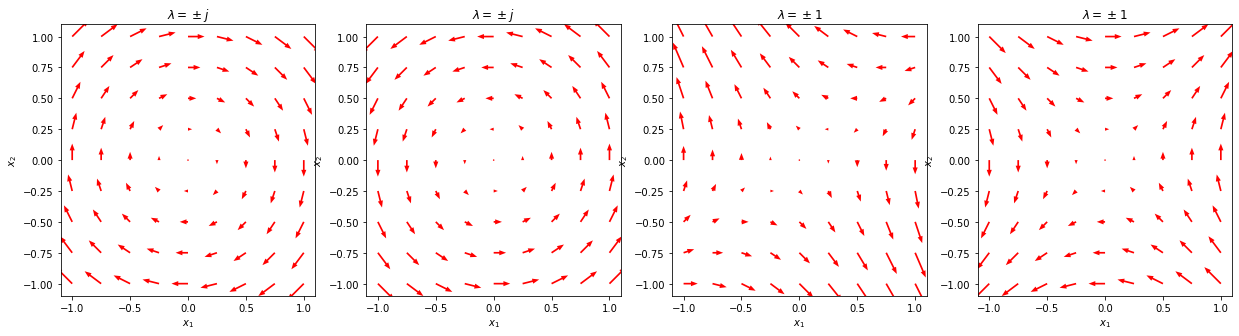

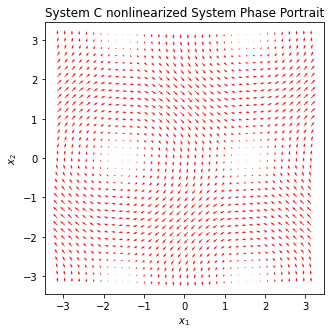

In [355]:
# iv) Linearized phase portraits
C1 = Matrix([[0, 1], [-1, 0]])
C2 = Matrix([[0, -1], [1, 0]])
C3 = Matrix([[0, -1], [-1, 1]])
C4 = Matrix([[0, 1], [1, 0]])

plot_phase_portrait([C1, C2, C3, C4], ["$\lambda = \pm j$", "$\lambda = \pm j$", "$\lambda = \pm 1$", "$\lambda = \pm 1$"])

# whole nonlinearized phase portrait around a few equilibrium points
plt.figure(2)
x_1 = np.linspace(-np.pi, np.pi, 36)
x_2 = np.linspace(-np.pi, np.pi, 36)
X_1, X_2 = np.meshgrid(x_1,x_2)
u = np.sin(X_2)
v = -np.cos(X_1)
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(X_1, X_2, u, v, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("System C nonlinearized System Phase Portrait");

## 2. Nonlinear Systems (20pts)
 

a) find a single nonlinear systems that has exactly four distinct equilibria, each of which has a different eigenvalue structure (i.e. a different type in the taxonomy). 

b) Find a nonlinear system that has the following phase portrait. Hint: Try polar coordinates. Plot the phase portait in Python.

<img src="https://raw.githubusercontent.com/klavins/ECE447/master/images/limit-cycle.png" width=30%>

##a)

When identifying four distinct equilibria, first we need to determine four distinct taxonomies which have unique eigenvalues pairs.

Repeated eigenvalues with same sign:

$$A = \begin{pmatrix} 
  a & 
  0 \\ 
  0 &
  a \end{pmatrix}, \lambda = a, a$$

Real distinct eigenvalues with same sign

$$A = \begin{pmatrix} 
  a & 
  0 \\ 
  0 &
  b \end{pmatrix}, \lambda = a, b$$

Real distinct eigenvalues with opposite sign

$$A = \begin{pmatrix} 
  a & 
  0 \\ 
  0 &
  -b \end{pmatrix}, \lambda = a, -b$$

Repeated eigenvalues with opposite sign

$$A = \begin{pmatrix} 
  a & 
  0 \\ 
  0 &
  -a \end{pmatrix}, \lambda = a, -a$$

Given that the format for matrix $A$ must follow the format:

$$A=\begin{pmatrix} 
  \frac{\partial f_1}{\partial x_1} & 
  \frac{\partial f_1}{\partial x_2} \\ 
  \frac{\partial f_2}{\partial x_1} &
  \frac{\partial f_2}{\partial x_2}\end{pmatrix}$$

We are only interested in the cases where the equilibrium points give us:

$$\frac{\partial f_1}{\partial x_1} = a, \frac{\partial f_2}{\partial x_2} = \pm a, \pm b$$

This gives us four equilibrium points we need to find, which can be achieved if $f_2$ is a fourth order polynomial.

The nonlinear system:
$$f_1(x_1, x_2) = x_1$$
$$f_2(x_1, x_2) = x_2^4-\frac{3}{2}x_2^2+\frac{1}{2}$$

Has equilibrium points at:
$$(0, 1), (0, -1), (0, \frac{\sqrt{2}}{2}), (0, -\frac{\sqrt{2}}{2})$$

Using this nonlinear system, matrix $A$ is:

$$A = \begin{pmatrix} 
  1 & 
  0 \\ 
  0 &
  4x_2^3-3x_2 \end{pmatrix}$$

$A$ evaluated at $(0, 1)$ gives repeated same sign eigenvalues:

$$A_{(0, 1)} = \begin{pmatrix} 
  1 & 
  0 \\ 
  0 &
  1 \end{pmatrix}$$

$A$ evaluated at $(0, -1)$ gives repeated opposite sign eigenvalues:

$$A_{(0, -1)} = \begin{pmatrix} 
  1 & 
  0 \\ 
  0 &
  -1 \end{pmatrix}$$

$A$ evaluated at $(0, \frac{\sqrt{2}}{2})$ gives distinct opposite sign eigenvalues:

$$A_{(0, \frac{\sqrt{2}}{2})} = \begin{pmatrix} 
  1 & 
  0 \\ 
  0 &
  -\frac{\sqrt{2}}{2} \end{pmatrix}$$

$A$ evaluated at $(0, -\frac{\sqrt{2}}{2})$ gives distinct same sign eigenvalues:

$$A_{(0, -\frac{\sqrt{2}}{2})} = \begin{pmatrix} 
  1 & 
  0 \\ 
  0 &
  \frac{\sqrt{2}}{2} \end{pmatrix}$$

##b)

Given a nonlinear system in polar coordinates:

$$\begin{pmatrix} \dot r \\ \dot \theta \end{pmatrix} = \begin{pmatrix} ar \\ -b \end{pmatrix}$$

Where if: $a>1$ the stability is an outward spiral. If $a<1$ the stability is a inward spiral. If $a=1$, the stability is a constant spiral. We want the spiral to converge at a fixed radius $c$, which occurs when $\dot r = ar + c$ where $c$ is the radius which the circle converges to.

With the modified system:

$$\begin{pmatrix} \dot r \\ \dot \theta \end{pmatrix} = \begin{pmatrix} ar + c \\ -b \end{pmatrix}$$

The system can be converted back to cartesian coordinates to get a nonlinear system in terms of $x_1$ and $x_2$.

$$\begin{pmatrix} \dot x_1 \\ \dot x_2 \end{pmatrix} = \begin{pmatrix} ax_1 + bx_2 + \frac{cx_1}{\sqrt{x_1^2+x_2^2}} \\ -bx_1 + ax_2 + \frac{cx_2}{\sqrt{x_1^2+x_2^2}} \end{pmatrix}$$

The phase portrait of this system with $a=-1$ and $b=1$ is plotted below.

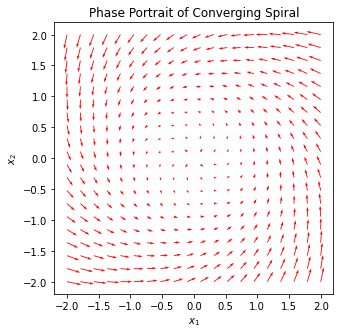

In [356]:
x_1 = np.linspace(-2, 2, 20)
x_2 = np.linspace(-2, 2, 20)
X_1, X_2 = np.meshgrid(x_1,x_2)
u = -X_1 - X_2 + X_1/np.sqrt(X_1**2+X_2**2)
v = -X_2 + X_1 + X_2/np.sqrt(X_1**2+X_2**2)
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(X_1, X_2, u, v, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Phase Portrait of Converging Spiral");

## 3. Jordan Form (20pts)


Use `sympy` to find the Jordan form for each matrix below. Describe what the Jordan blocks are in each case. Show that in each case $A = PJP^{-1}$ and that $e^{At} = Pe^{Jt}P^{-1}$. 

$$
A = \begin{pmatrix}
1 & -3 & 3 & 0 \\
-2 & 1 & 2 & 0 \\
-2 & -3 & 6 & 0 \\
-1 & -1 & 1 & 2
\end{pmatrix}
$$

$$
A = \begin{pmatrix}
0 & 0 & 0 & 1 \\
-2 & 2 & 0 & 1 \\
-2 & -1 & 3 & 1 \\
-1 & 0 & 0 & 2
\end{pmatrix}
$$

$$
A = \begin{pmatrix}
0 & -3 & 1 & 1 \\
1 & -3 & 0 & 1 \\
1 & -2 & -1 & 1 \\
2 & -1 & -2 & 0
\end{pmatrix}
$$

## Matrix 1

$$
A = \begin{pmatrix}
1 & -3 & 3 & 0 \\
-2 & 1 & 2 & 0 \\
-2 & -3 & 6 & 0 \\
-1 & -1 & 1 & 2
\end{pmatrix}
$$

This matrix has the jordan form:

$$J = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 3 & 0 \\
0 & 0 & 0 & 4
\end{pmatrix}$$

Which means that it is made out of four Jordan blocks:

$$J = 
\begin{pmatrix}
J_1(1) & 0 & 0 & 0 \\
0 & J_1(2) & 0 & 0 \\
0 & 0 & J_1(3) & 0 \\
0 & 0 & 0 & J_1(4)
\end{pmatrix}$$



In [357]:
A1 = Matrix([
    [1, -3, 3, 0],
    [-2, 1, 2, 0],
    [-2, -3, 6, 0],
    [-1, -1, 1, 2]
])

# get the Jordan form and P matrix from A
P1, J1 = A1.jordan_form()
display(J1)
display(P1)

# use P*J*P^-1 to get back to A
A1_calc = P1*J1*P1.inv()
display(A1_calc)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  2  0  0⎥
⎢          ⎥
⎢0  0  3  0⎥
⎢          ⎥
⎣0  0  0  4⎦

⎡1  0  0  1⎤
⎢          ⎥
⎢1  0  1  0⎥
⎢          ⎥
⎢1  0  1  1⎥
⎢          ⎥
⎣1  1  0  0⎦

⎡1   -3  3  0⎤
⎢            ⎥
⎢-2  1   2  0⎥
⎢            ⎥
⎢-2  -3  6  0⎥
⎢            ⎥
⎣-1  -1  1  2⎦

In [358]:
# create e^Jt matrix
var("t")
eJ1t = exp(J1*t)
display(eJ1t)

⎡ t                  ⎤
⎢ℯ    0     0     0  ⎥
⎢                    ⎥
⎢     2⋅t            ⎥
⎢0   ℯ      0     0  ⎥
⎢                    ⎥
⎢           3⋅t      ⎥
⎢0    0    ℯ      0  ⎥
⎢                    ⎥
⎢                 4⋅t⎥
⎣0    0     0    ℯ   ⎦

In [359]:
# use P*e^Jt*P^-1 to get e^At
eA1t = P1*eJ1t*P1.inv()
eA1t.simplify()
display(eA1t.simplify())

⎡      t            4⋅t    t       4⋅t    t          ⎤
⎢     ℯ          - ℯ    + ℯ       ℯ    - ℯ        0  ⎥
⎢                                                    ⎥
⎢    3⋅t    t         t            3⋅t    t          ⎥
⎢ - ℯ    + ℯ         ℯ            ℯ    - ℯ        0  ⎥
⎢                                                    ⎥
⎢    3⋅t    t       4⋅t    t    4⋅t    3⋅t    t      ⎥
⎢ - ℯ    + ℯ     - ℯ    + ℯ    ℯ    + ℯ    - ℯ    0  ⎥
⎢                                                    ⎥
⎢⎛   t    ⎞  t  ⎛   t    ⎞  t    ⎛ t    ⎞  t      2⋅t⎥
⎣⎝- ℯ  + 1⎠⋅ℯ   ⎝- ℯ  + 1⎠⋅ℯ     ⎝ℯ  - 1⎠⋅ℯ      ℯ   ⎦

In [360]:
# use sympy to directly calculate e^At to show it is equal to P*e^Jt*P^-1
w1 = exp(A1*t).simplify()
display(w1)

⎡      t            4⋅t    t       4⋅t    t          ⎤
⎢     ℯ          - ℯ    + ℯ       ℯ    - ℯ        0  ⎥
⎢                                                    ⎥
⎢    3⋅t    t         t            3⋅t    t          ⎥
⎢ - ℯ    + ℯ         ℯ            ℯ    - ℯ        0  ⎥
⎢                                                    ⎥
⎢    3⋅t    t       4⋅t    t    4⋅t    3⋅t    t      ⎥
⎢ - ℯ    + ℯ     - ℯ    + ℯ    ℯ    + ℯ    - ℯ    0  ⎥
⎢                                                    ⎥
⎢⎛   t    ⎞  t  ⎛   t    ⎞  t    ⎛ t    ⎞  t      2⋅t⎥
⎣⎝- ℯ  + 1⎠⋅ℯ   ⎝- ℯ  + 1⎠⋅ℯ     ⎝ℯ  - 1⎠⋅ℯ      ℯ   ⎦

## Matrix 2

$$
A = \begin{pmatrix}
1 & -3 & 3 & 0 \\
-2 & 1 & 2 & 0 \\
-2 & -3 & 6 & 0 \\
-1 & -1 & 1 & 2
\end{pmatrix}
$$

This matrix has the jordan form:

$$J = 
\begin{pmatrix}
1 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 2 & 0 \\
0 & 0 & 0 & 3
\end{pmatrix}$$

Which means that it is made out of three Jordan blocks:

$$J = 
\begin{pmatrix}
J_2(1) & 0 & 0 \\
0 & J_1(2) & 0 \\
0 & 0 & J_1(3)
\end{pmatrix}$$



In [361]:
A2 = Matrix([
    [0, 0, 0, 1],
    [-2, 2, 0, 1],
    [-2, -1, 3, 1],
    [-1, 0, 0, 2]
])

# get the Jordan form and P matrix from A
P2, J2 = A2.jordan_form()
display(J2)
display(P2)

# use P*J*P^-1 to get back to A
A2_calc = P2*J2*P2.inv()
display(A2_calc)

⎡1  1  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  2  0⎥
⎢          ⎥
⎣0  0  0  3⎦

⎡-1  1  0  0⎤
⎢           ⎥
⎢-1  1  1  0⎥
⎢           ⎥
⎢-1  1  1  1⎥
⎢           ⎥
⎣-1  0  0  0⎦

⎡0   0   0  1⎤
⎢            ⎥
⎢-2  2   0  1⎥
⎢            ⎥
⎢-2  -1  3  1⎥
⎢            ⎥
⎣-1  0   0  2⎦

In [362]:
# create e^Jt matrix
var("t")
eJ2t = exp(J2*t)
display(eJ2t)

⎡ t     t            ⎤
⎢ℯ   t⋅ℯ    0     0  ⎥
⎢                    ⎥
⎢      t             ⎥
⎢0    ℯ     0     0  ⎥
⎢                    ⎥
⎢           2⋅t      ⎥
⎢0    0    ℯ      0  ⎥
⎢                    ⎥
⎢                 3⋅t⎥
⎣0    0     0    ℯ   ⎦

In [363]:
# use P*e^Jt*P^-1 to get e^At
eA2t = P2*eJ2t*P2.inv()
display(eA2t.simplify())

⎡            t                                  t   ⎤
⎢  (-t + 1)⋅ℯ             0          0       t⋅ℯ    ⎥
⎢                                                   ⎥
⎢⎛      t    ⎞  t        2⋅t                    t   ⎥
⎢⎝-t - ℯ  + 1⎠⋅ℯ        ℯ            0       t⋅ℯ    ⎥
⎢                                                   ⎥
⎢⎛      t    ⎞  t  ⎛   t    ⎞  2⋅t   3⋅t        t   ⎥
⎢⎝-t - ℯ  + 1⎠⋅ℯ   ⎝- ℯ  + 1⎠⋅ℯ     ℯ        t⋅ℯ    ⎥
⎢                                                   ⎥
⎢         t                                        t⎥
⎣     -t⋅ℯ                0          0    (t + 1)⋅ℯ ⎦

In [364]:
# use sympy to directly calculate e^At to show it is equal to P*e^Jt*P^-1
w2 = exp(A2*t).simplify()
display(w2)

⎡            t                                  t   ⎤
⎢  (-t + 1)⋅ℯ             0          0       t⋅ℯ    ⎥
⎢                                                   ⎥
⎢⎛      t    ⎞  t        2⋅t                    t   ⎥
⎢⎝-t - ℯ  + 1⎠⋅ℯ        ℯ            0       t⋅ℯ    ⎥
⎢                                                   ⎥
⎢⎛      t    ⎞  t  ⎛   t    ⎞  2⋅t   3⋅t        t   ⎥
⎢⎝-t - ℯ  + 1⎠⋅ℯ   ⎝- ℯ  + 1⎠⋅ℯ     ℯ        t⋅ℯ    ⎥
⎢                                                   ⎥
⎢         t                                        t⎥
⎣     -t⋅ℯ                0          0    (t + 1)⋅ℯ ⎦

## Matrix 3

$$
A = \begin{pmatrix}
1 & -3 & 3 & 0 \\
-2 & 1 & 2 & 0 \\
-2 & -3 & 6 & 0 \\
-1 & -1 & 1 & 2
\end{pmatrix}
$$

This matrix has the jordan form:

$$J = 
\begin{pmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
0 & 0 & -1 & 1 \\
0 & 0 & 0 & -1
\end{pmatrix}$$

Which means that it is made out of a single Jordan block:

$$J = J_4(-1)$$



In [365]:
A3 = Matrix([
    [0, -3, 1, 1],
    [1, -3, 0, 1],
    [1, -2, -1, 1],
    [2, -1, -2, 0]
])

# get the Jordan form and P matrix from A
P3, J3 = A3.jordan_form()
display(J3)
display(P3)

# use P*J*P^-1 to get back to A
A3_calc = P3*J3*P3.inv()
display(A3_calc)

⎡-1  1   0   0 ⎤
⎢              ⎥
⎢0   -1  1   0 ⎥
⎢              ⎥
⎢0   0   -1  1 ⎥
⎢              ⎥
⎣0   0   0   -1⎦

⎡-1  0   -3  0⎤
⎢             ⎥
⎢-1  0   -2  1⎥
⎢             ⎥
⎢-1  0   -2  0⎥
⎢             ⎥
⎣-1  -1  -1  0⎦

⎡0  -3  1   1⎤
⎢            ⎥
⎢1  -3  0   1⎥
⎢            ⎥
⎢1  -2  -1  1⎥
⎢            ⎥
⎣2  -1  -2  0⎦

In [366]:
# create e^Jt matrix
var("t")
eJ3t = exp(J3*t)
display(eJ3t)

⎡             2  -t   3  -t⎤
⎢ -t     -t  t ⋅ℯ    t ⋅ℯ  ⎥
⎢ℯ    t⋅ℯ    ──────  ──────⎥
⎢              2       6   ⎥
⎢                          ⎥
⎢                     2  -t⎥
⎢       -t      -t   t ⋅ℯ  ⎥
⎢ 0    ℯ     t⋅ℯ     ──────⎥
⎢                      2   ⎥
⎢                          ⎥
⎢              -t       -t ⎥
⎢ 0     0     ℯ      t⋅ℯ   ⎥
⎢                          ⎥
⎢                      -t  ⎥
⎣ 0     0      0      ℯ    ⎦

In [367]:
# use P*e^Jt*P^-1 to get e^At
eA3t = P3*eJ3t*P3.inv()
display(eA3t.simplify())

⎡⎛ 2        ⎞           ⎛ 2     ⎞  -t        ⎛ 2          ⎞  -t             ⎤
⎢⎜t         ⎟  -t    -t⋅⎝t  + 18⎠⋅ℯ        t⋅⎝t  - 3⋅t + 6⎠⋅ℯ          -t   ⎥
⎢⎜── + t + 1⎟⋅ℯ      ─────────────────     ────────────────────     t⋅ℯ     ⎥
⎢⎝2         ⎠                6                      6                       ⎥
⎢                                                                           ⎥
⎢            -t    ⎛   3           ⎞  -t       2          -t                ⎥
⎢ t⋅(t + 2)⋅ℯ      ⎝- t  - 12⋅t + 6⎠⋅ℯ        t ⋅(t - 3)⋅ℯ             -t   ⎥
⎢ ─────────────    ─────────────────────      ──────────────        t⋅ℯ     ⎥
⎢       2                    6                      6                       ⎥
⎢                                                                           ⎥
⎢            -t         ⎛ 2     ⎞  -t      ⎛ 3      2    ⎞  -t              ⎥
⎢ t⋅(t + 2)⋅ℯ        -t⋅⎝t  + 12⎠⋅ℯ        ⎝t  - 3⋅t  + 6⎠⋅ℯ           -t   ⎥
⎢ ─────────────      ─────────────────     ───────────────────  

In [368]:
# use sympy to directly calculate e^At to show it is equal to P*e^Jt*P^-1
w3 = exp(A3*t).simplify()
display(w3)

⎡⎛ 2        ⎞           ⎛ 2     ⎞  -t        ⎛ 2          ⎞  -t             ⎤
⎢⎜t         ⎟  -t    -t⋅⎝t  + 18⎠⋅ℯ        t⋅⎝t  - 3⋅t + 6⎠⋅ℯ          -t   ⎥
⎢⎜── + t + 1⎟⋅ℯ      ─────────────────     ────────────────────     t⋅ℯ     ⎥
⎢⎝2         ⎠                6                      6                       ⎥
⎢                                                                           ⎥
⎢            -t    ⎛   3           ⎞  -t       2          -t                ⎥
⎢ t⋅(t + 2)⋅ℯ      ⎝- t  - 12⋅t + 6⎠⋅ℯ        t ⋅(t - 3)⋅ℯ             -t   ⎥
⎢ ─────────────    ─────────────────────      ──────────────        t⋅ℯ     ⎥
⎢       2                    6                      6                       ⎥
⎢                                                                           ⎥
⎢            -t         ⎛ 2     ⎞  -t      ⎛ 3      2    ⎞  -t              ⎥
⎢ t⋅(t + 2)⋅ℯ        -t⋅⎝t  + 12⎠⋅ℯ        ⎝t  - 3⋅t  + 6⎠⋅ℯ           -t   ⎥
⎢ ─────────────      ─────────────────     ───────────────────  

##4. Matrix Exponential Properties (20pts)


Recall that for matrices $A$ and $B$ that it is not necessarily the case that $AB = BA$ (i.e. that $A$ and $B$ commute). Show that 
- (a) If $AB=BA$ then $e^Ae^B = e^Be^A$ using the definition of the matrix exponential as a series.
- (b) Find an example of where $A$ and $B$ do not commute and show that $e^Ae^B \neq e^Be^A$.

##a)

Using the Talor expansion on $e^A$:

$$
e^{A} = I + A + \frac{(A)^2}{2!} + \frac{(A)^3}{3!} + \dots
$$

And $e^B$:

$$
e^{B} = I + B + \frac{(B)^2}{2!} + \frac{(B)^3}{3!} + \dots
$$

Then: 
$$e^Ae^B = I + A + \frac{(A)^2}{2!} + B + AB + \frac{(A)^2B}{2!} + \frac{(B)^2}{2!} + \frac{A(B)^2}{2!} + \frac{(AB)^2}{2!} + \dots $$

We can combine terms with like denominators such as:

$$\frac{A^2+AB+BA+B^2}{2!}$$

But if we know that:

$$AB= BA$$

Then we can simplify the term to:

$$\frac{A^2+AB+BA+B^2}{2!} = \frac{A^2+2AB+B^2}{2!} =  \frac{(A+B)^2}{2!}$$

Which results in the overall equation:

$$e^Ae^B = I + (A+B) + \frac{(A+B)^2}{2!} + \frac{(A+B)^3}{3!} + \dots$$

Which is equal to:

$$e^Ae^B = e^{(A+B)}$$

Ande since we know that matrix addition is commutative:

$$e^{(A+B)}= e^{(B+A)} = e^Be^A$$

Therefore if $AB=BA$, by the additive commutative property of matrices, $e^Ae^B = e^{(A+B)} = e^{(B+A)} = e^Be^A$.

##b)

If we have:

$$
A = \begin{pmatrix}1 & 1 \\ 0 & 1\end{pmatrix}, B = \begin{pmatrix} 1 & 0 \\ 1 & 1\end{pmatrix}
$$

We get that:

$$
AB = \begin{pmatrix}2 & 1 \\ 1 & 1\end{pmatrix}, BA = \begin{pmatrix} 1 & 1 \\ 1 & 2\end{pmatrix}
$$

Which clearly shows that $A$ and $B$ are not commutative

We can then find:

$$
e^A = \begin{pmatrix}e & e \\ 0 & e\end{pmatrix}, e^B = \begin{pmatrix} e & 0 \\ e & e\end{pmatrix}
$$

To get that:

$$
e^Ae^B = \begin{pmatrix} 2e^2 & e^2 \\ e^2 & e^2\end{pmatrix}, e^Be^A = \begin{pmatrix} e^2 & e^2 \\ e^2 & 2e^2\end{pmatrix}
$$

Which clearly shows that $e^A$ and $e^B$ are also not commutative.

In [369]:
#sympy for problem 4b
A4 = Matrix([
             [1, 1], 
             [0, 1]
])

B4 = Matrix([
             [1, 0], 
             [1, 1]
])

display(A4*B4)
display(B4*A4)

display(exp(A4)*exp(B4))
display(exp(B4)*exp(A4))

⎡2  1⎤
⎢    ⎥
⎣1  1⎦

⎡1  1⎤
⎢    ⎥
⎣1  2⎦

⎡   2   2⎤
⎢2⋅ℯ   ℯ ⎥
⎢        ⎥
⎢  2    2⎥
⎣ ℯ    ℯ ⎦

⎡ 2    2 ⎤
⎢ℯ    ℯ  ⎥
⎢        ⎥
⎢ 2     2⎥
⎣ℯ   2⋅ℯ ⎦

## 5. Tuning Eigenvalues (20pts)


Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k+1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2. For what values of $k$ is the system stable? Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$. 

Hint: Do this in `sympy`. Use `lambdify` to convert the eigenvalue real parts to functions so you can plot them. 

Given matrix A the eigenvalues as a function of $k$ are:

$$\lambda_1 = k - \frac{1}{2} \sqrt{1-4k} + \frac{1}{2}, \lambda_2 = k + \frac{1}{2} \sqrt{1-4k} + \frac{1}{2}$$

We get that the eigenvalues have defined real part when $k<\frac{1}{2}$ and the linearized system is stable when $k<-2$.

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """


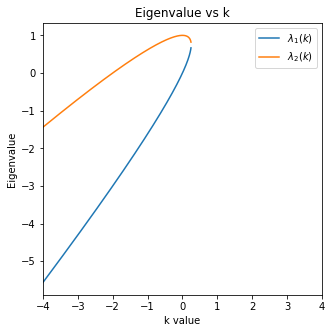

In [370]:
k = var("k", real=True)
A5 = Matrix([
            [k, -k],
            [1, k+1]
])

e1, e2 = A5.eigenvals()

k_vals = np.linspace(-4, 4, 1000)

f_e1 = lambdify(k, e1, modules=['numpy'])
f_e2 = lambdify(k, e2, modules=['numpy'])

plt.figure(1)
plt.plot(k_vals, f_e1(k_vals), label = "$\lambda_1(k)$")
plt.plot(k_vals, f_e2(k_vals), label = "$\lambda_2(k)$")
plt.xlabel("k value")
plt.xlim(-4, 4)
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue vs k")
plt.legend()

Below are three sample phase portraits where the system is stable where $k = -3, -4, -5$

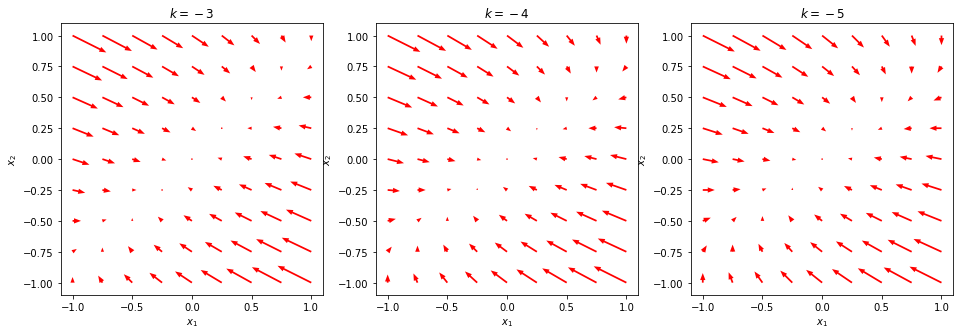

In [371]:
K3 = Matrix([
            [-3, 3],
            [1, -2]
])

K4 = Matrix([
            [-4, 4],
            [1, -3]
])

K5 = Matrix([
            [-5, 5],
            [1, -4]
])
plot_phase_portrait([K3, K4, K5], ["$k=-3$", "$k=-4$", "$k=-5$"])

